# University Enrollment



The dataset contains 1850 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

* course_id: Same as description without missing values.
* course_type : Same as description without missing values. 2 course types
* Year: Same as description without missing values.
* enrollment_count: Same as description without missing values.
* pre_score: same as description, but missing value as a '_', which i then replace with 0 and convert it to float.
* Post_score:  185 missing values, so I replace the missing values 0 and convert it to integer.
* pre_requirement: 89 missing values, so I replace the missing values "None".
* Department: It contains 5 unique value instead of 4. Since 'Math' is same as 'Mathematics' i replaced 'math' with 'mathematics'

After the data validation, the dataset contains 1850 rows and 8 columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset 
df = pd.read_csv("university_enrollment_2306.csv")

# display the dataframe
df



,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [2]:
#data summary
df.info()

#confitming the rows and columns in the dataframe
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB
(1850, 8)


## Data validation and cleaning

In [3]:
#Validating the course_id column

#checking for missing value

print(df['course_id'].isna().sum())

#checking data type

print(df['course_id'].dtype)

0
int64


In [4]:
#Validating the course_type column
print(df['course_type'].unique())

#checking for missing value
print(df['course_type'].isna().sum())

#checking data type
print(df['course_type'].dtype)

['classroom' 'online']
0
object


In [5]:
#Validating the year column

#checking for missing value
print(df['year'].isna().sum())

#checking for unique value
print(df['year'].unique())

#checking data type
print(df['year'].dtype)


0
[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]
int64


In [6]:
# validating and cleaning the pre score column
#checking the data type
print(df['pre_score'].dtype)

#checking for missing value
print(df['pre_score'].isna().sum())

# identify and converting a non numeric input data to NaN
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')

# filling NaN with zero and convert the column data type to float
df['pre_score'] = df['pre_score'].fillna(0).astype(float)

#rechecking the data type
print(df['pre_score'].dtype)

object
0
float64


In [7]:
# validating and cleaning the post score column

#checking the data type
print(df['post_score'].dtype)

#checking for missing value
print(df['post_score'].isna().sum())

# filling NaN with zero and convert the column data type to integer
df['post_score'] = df['post_score'].fillna(0).astype(int)

#rechecking the data type
print(df['post_score'].dtype)

float64
185
int32


In [8]:
#Validating the pre_requirement column

#checking for missing value
print(df['pre_requirement'].isna().sum())

#checking for unique value
print(df['pre_requirement'].unique())

# filling NaN with None
df['pre_requirement'] = df['pre_requirement'].fillna('None')

#revalidating the pre_requirement column
print(df['pre_requirement'].unique())

#checking data type
print(df['pre_requirement'].dtype)

891
['Beginner' nan 'Intermediate']
['Beginner' 'None' 'Intermediate']
object


In [9]:
#Validating the department column

#checking for missing value
print(df['department'].isna().sum())

#checking for unique value
print(df['department'].unique())

# Replacing Math with Mathematics
df['department'] = df['department'].replace('Math', 'Mathematics') 

#checking data type
print(df['department'].dtype)


0
['Science' 'Mathematics' 'Technology' 'Math' 'Engineering']
object


In [10]:
# data summary for reconfirming missing values
print(df.info())

# statiscal summary
print(df.describe())

#reconfirming the shape
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   int32  
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 108.5+ KB
None
         course_id         year  enrollment_count    pre_score   post_score
count  1850.000000  1850.000000       1850.000000  1850.000000  1850.000000
mean    925.500000  2016.423784        231.565405    46.047022    67.684324
std     534.193317     3.448278         36.987029    30.555461    23.968697
min       1.000000  2011.000000        15

## Task 2
The enrollment counts distribution is a symmetrical bimodal distribution, This distribution shape provides insight into the nature of the enrollment data indicating possible  categories of student enrollment. The peak and concentration on the left represents lower enrollment in that division, while the right show a significant amount of student enrolled with approxiamtely 261 as the highest enrolled number of student meaning student enrolled more in this division. 

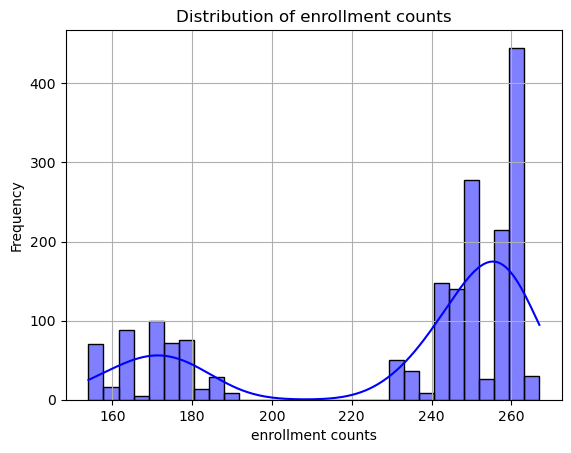

In [11]:
import seaborn as sns
sns.histplot(data=df, x='enrollment_count', bins=30, kde=True, color='blue')
plt.xlabel('enrollment counts')
plt.ylabel('Frequency')
plt.title('Distribution of enrollment counts')
plt.grid(True)
plt.show()

## Task 3

Online course type has the highest enrollments with 1375 students enrolled. 

There's no balance in courses, The online course type category has a significant number of enrollment while the classroom has the least enrolments as shown below.
¶
* online: 1375
* classroom: 475

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


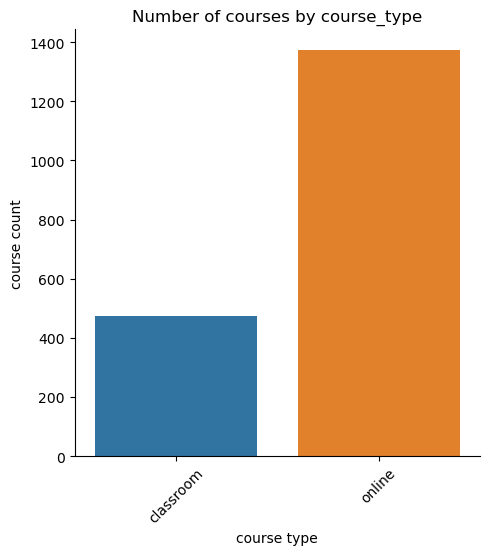

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [12]:
import seaborn as sns
sns.catplot(x='course_type', y='course_id', data=df, kind='bar',  estimator=lambda x: len(x))
plt.xlabel('course type')
plt.ylabel('course count')
plt.title('Number of courses by course_type')
plt.xticks(rotation=45)
plt.show()

# The hit category has most number of attendance of about 667

# The plot show st number of attendance
course_type_count = df['course_type'].value_counts()
course_type_count

## Task 4
There is an abrupt change in course enrollment by student. this implies a non linear relationship though there's no clear relationship as online course type has highest enrolment rate which means most student prefer to study online than in classroom.

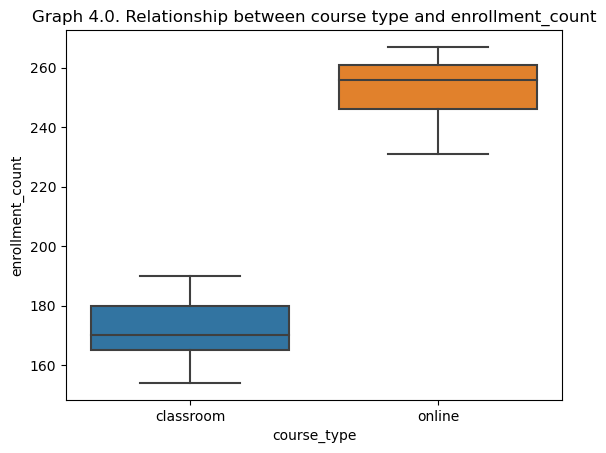

In [13]:
sns.boxplot( x= df['course_type'], y=df['enrollment_count'],)
plt.xlabel('course_type')
plt.ylabel('enrollment_count')
plt.title('Graph 4.0. Relationship between course type and enrollment_count')
plt.show()

## To enable the model fit, i Converted all the categorical variables into numeric variables by encoding their value.

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder to convert categorical variable into numerical variable
encoder = OneHotEncoder(sparse=False)

# Reshape the input columns to a 2D array
columns_to_encode = ['course_type', 'pre_requirement', 'department']
column_values = df[columns_to_encode].values

# Encode the categorical columns
encoded_features = encoder.fit_transform(column_values)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded features DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# Now you have the DataFrame with encoded features added
df_encoded

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,course_id,year,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,1,2018,165,28.14,73,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,2020,175,79.68,86,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,2016,257,57.24,80,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,2013,251,97.67,75,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2019,165,39.75,76,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,1846,2018,155,60.01,81,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1846,1847,2016,261,94.27,85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1847,1848,2011,257,76.00,81,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1848,1849,2013,256,20.67,66,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Task 5
This is a regression problem because we are predicting how many student will enroll in a course

## Task 6
Fiting the baseline model - Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = df_encoded.drop('enrollment_count', axis=1)
target = df_encoded['enrollment_count']

#splitting dataset into 80-20 train and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


#instantiate our model
linReg = LinearRegression()

#fitting the model
linReg.fit(X_train, y_train)

#predicting enrollment count
y_pred_baseline = linReg.predict(X_test)
y_pred_baseline
print(y_pred_baseline.mean())

232.66900457723273


## Task 7
Fitting the comparison model - Randomforest regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

#instantiate the regressor
comparison_model = RandomForestRegressor(n_estimators=100, random_state=42)

#fitting the model
comparison_model.fit(X_train, y_train)

#predicting enrollment count
y_pred_compared = comparison_model.predict(X_test)

y_pred_compared

print(y_pred_compared.mean())

232.676


## Task 8
I chose a linear model due to its simplicity and interpretability. Linear models make assumptions that the relationships between features and target are linear, which enables straightforward training of model and inferences. As a comparison, I also trained a random forest classifier, which can capture more complex nonlinear relationships through its ensemble of decision trees. Random forests build multiple trees on subsets of data and average their results, allowing flexibility to model interactions and non-linear patterns.

## Task 9
I compare my model using root mean square error (RMSE)

In [17]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import numpy as np

# Calculate and print the mean squared error for the baseline model
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
print("MSE of baseline model:", baseline_mse)

# Calculate and print the mean squared error for the compared model
compared_mse = mean_squared_error(y_test, y_pred_compared)
print("MSE of comparison model:", compared_mse)

# Calculate and print the root mean squared error for the baseline model
baseline_mse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
print("RMSE of baseline model:", baseline_mse)

# Calculate and print the root mean squared error for the compared model
baseline_mse = np.sqrt(mean_squared_error(y_test, y_pred_compared))
print("RMSE of compared model:", compared_mse)

MSE of baseline model: 0.09915770269518773
MSE of comparison model: 0.1174740540540541
RMSE of baseline model: 0.31489316076280177
RMSE of compared model: 0.1174740540540541


## Task 10
The comparison model perform better based on RMSE lower value which indicate small residual error and a better fit of the model as it measures the magnitutude of error between actual and predicted value

## Prediction: Base on the model prediction approximately 232 students will enroll.